## 기본 세팅

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
src = cv2.imread('scale.jpg')

# 연습

In [6]:
def plot_histogram(source, title, mask=None):
    channels = cv2.split(source)
    colors = ('b','g','r')
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel('# of Pixels')
    
    for (channel, color) in zip(channels, colors):
        hist = cv2.calcHist([channel], [0], mask, [256], [0,256])
        plt.plot(hist, color=color)
        plt.xlim([0,256])

-1

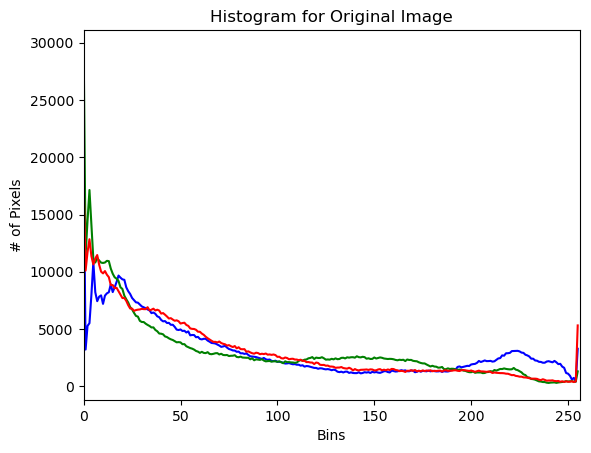

In [7]:
cv2.imshow('Original', src)
plot_histogram(src, "Histogram for Original Image")

mask = np.zeros(src.shape[:2], dtype='uint8')
cv2.rectangle(mask, (15,15), (500,500), 255, -1)
cv2.imshow("Mask", mask)

masked = cv2.bitwise_and(src, src, mask=mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)

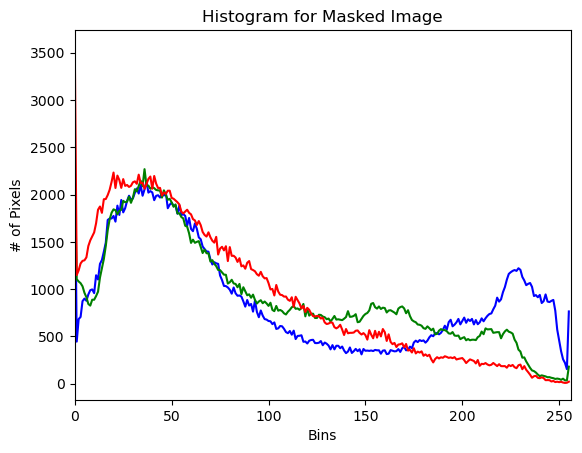

In [8]:
plot_histogram(src, "Histogram for Masked Image", mask=mask)
plt.show()

In [9]:
mask = np.zeros(src.shape[:2], dtype='uint8')
cv2.rectangle(mask, (15,15), (500,500), 255, -1)
cv2.imshow("Mask", mask)

masked = cv2.bitwise_and(src, src, mask=mask)
gray_masked = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
eq = cv2.equalizeHist(gray_masked)
cv2.imshow("Applying the Mask", eq)
cv2.waitKey(0)

-1

In [11]:
cv2.imshow('Mask', mask)
cv2.waitKey(0)

-1

### 블러

In [13]:
blurred = np.hstack([
    cv2.blur(src, (5,5)),    
    cv2.blur(src, (7,7))    
])

cv2.imshow("Averaged", blurred)
cv2.waitKey(0)

-1

### 가우시안 블러
* 중앙 픽셀에 가까운 인접 픽셀이 평균에 더 많은 가중치를 부여
* 평균 방식보다 이미지가 더 흐려지지는 않지만 더 자연스러운 블러 효과 부여 가능

In [15]:
gb_blurred = np.hstack([
    cv2.GaussianBlur(src, (5,5), 0),    
    cv2.GaussianBlur(src, (7,7), 0)    
])

cv2.imshow("Gaussian", gb_blurred)
cv2.waitKey(0)

-1

### 메디안 블러
* Salt-Paper 노이즈를 제거할 때 효과적인 블러
* 커널 크기 k를 정의하면 k*k의 이웃에 있는 픽셀들을 고려
* 중앙 픽셀을 이웃의 중앙값으로 대체

In [28]:
evening = cv2.imread('ev.jpg') 
resize_ev = cv2.resize(evening, (700,700))

In [25]:
median_blurred = np.hstack([
    cv2.medianBlur(resize_ev, 7),    
    cv2.medianBlur(resize_ev, 13) 
])

cv2.imshow("Median", median_blurred)
cv2.waitKey(0)

-1

### 번짐(bilateral) 블러
* 기존의 블러들은 이미지의 노이즈와 선명함을 줄였지만 이미지의 가장 자리를 잃었다.
* 번짐 블러는 가장 자리를 유지하면서 노이즈를 줄일 수 있지만 계산의 시간이 오래 걸린다.

In [29]:
bilateral_blur = np.hstack([
    cv2.bilateralFilter(resize_ev, 5, 21, 21),    
    cv2.bilateralFilter(resize_ev, 7, 31, 31) 
])

cv2.imshow("Bilateral blur", bilateral_blur)
cv2.waitKey(0)

-1

### Thresholding
* 이미지의 이진화
* 기준이 되는 p값을 설정하고 p값을 기준으로 낮으면 0, 높으면 255로 픽셀 강도를 변경
* cv2.threshold(src, threshold, maxvalue, type[, dst])

In [2]:
src = cv2.imread('coin.jpg')

In [7]:
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_src, (49,49), 0)
cv2.imshow("Gray-blurred", gray_src)

t_value = 138
(T, thresh) = cv2.threshold(blurred, t_value, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh)

(T, threshlnv) = cv2.threshold(blurred, t_value, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Coins", cv2.bitwise_and(gray_src, gray_src, mask = threshlnv))
cv2.waitKey(0)

-1

In [4]:
gray_src = cv2.cvtColor(src[:445, :], cv2.COLOR_BGR2GRAY)
blur_value = 29
blurred = cv2.GaussianBlur(gray_src, (blur_value,blur_value), 0)
cv2.imshow("Gray-blurred", gray_src)

t_value = 131
(T, thresh) = cv2.threshold(blurred, t_value, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh)

(T, threshlnv) = cv2.threshold(blurred, t_value, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Coins", cv2.bitwise_and(gray_src, gray_src, mask = threshlnv))
cv2.waitKey(0)

-1

## Adaptive thresholding
* cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst[, maxval]]
* Threshold 값을 알아서 찾는 방법

In [9]:
thresh_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
            cv2.THRESH_BINARY_INV, 11, 3)

cv2.imshow('Mean Thresh', thresh_mean)

thresh_gaussian = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
            cv2.THRESH_BINARY_INV, 11, 3)

cv2.imshow('Gaussian Thresh', thresh_gaussian)
cv2.waitKey(0)

-1

### Otsu 
* Otsu 방법은 t값을 자동으로 계산할 수 있는 다른 방법이다.
* 이미지의 그레이 스케일 히스토그램에 두 개의 피크가 있다고 가정하고 분리하는 최적의 값을 찾으려고 한다.

In [14]:
!pip install mahotas

In [19]:
import mahotas

In [23]:
blur_value = 50

blurred = cv2.blur(src, (blur_value,blur_value))
gaussian_blurred = cv2.GaussianBlur(gray_src, (blur_value,blur_value), 0)
median_blurred = cv2.medianBlur(gray_src, blur_value)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:294: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'cv::createGaussianKernels'


In [24]:
T = mahotas.thresholding.otsu(blurred)
print(f"Otsu's threshhold : {T}")

thresh = gray_src.copy()
thresh[thresh > T] = 255
thresh[thresh < T] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Otsu", thresh)

T = mahotas.thresholding.rc(blurred)
gaussian_T = mahotas.thresholding.rc(gaussian_blurred)
median_T = mahotas.thresholding.rc(median_blurred)
print(f"Riddler-Calvard : {T}")
print(f"Riddler-Calvard(Gaussian) : {gaussian_T}")
print(f"Riddler-Calvard(Median) : {median_T}")

thresh = gray_src.copy()
thresh[thresh > T] = 255
thresh[thresh < T] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Riddler-Calvard", thresh)

thresh = gray_src.copy()
thresh[thresh > gaussian_T] = 255
thresh[thresh < gaussian_T] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Riddler-Calvard(Gaussian)", thresh)

thresh = gray_src.copy()
thresh[thresh > median_T] = 255
thresh[thresh < median_T] = 0
thresh = cv2.bitwise_not(thresh)
cv2.imshow("Riddler-Calvard(Median)", thresh)
cv2.waitKey(0)

Otsu's threshhold : 142
Riddler-Calvard : 141.74596208647824
Riddler-Calvard(Gaussian) : 138.36584198744887
Riddler-Calvard(Median) : 135.52140813983368


-1

블러별 차이는 크게 없는 것으로 보임

### Edge detection

#### 라플라시안

In [4]:
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original", gray_src)

lap = cv2.Laplacian(gray_src, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2.imshow("Laplacian", lap)
cv2.waitKey(0)

-1

#### 소벨

In [5]:
sobelX = cv2.Sobel(gray_src, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(gray_src, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobelCombined = cv2.bitwise_or(sobelX, sobelY)
cv2.imshow("Sobel X", sobelX)
cv2.imshow("Sobel Y", sobelX)
cv2.imshow("Sobel Combined", sobelX)
cv2.waitKey(0)

-1

#### Canny edge detector

In [8]:
gaussian_blur = cv2.GaussianBlur(gray_src, (5,5), 0, 13)
canny = cv2.Canny(gaussian_blur, 30, 150)

cv2.imshow("Canny", canny)
cv2.waitKey(0)

temp = np.hstack((gray_src, canny))
cv2.imshow("Gray / Canny", temp)
cv2.waitKey(0) 

-1